Name: Sushil Khanal

Course Title: Advanced Big Data and Data Mining

Lab Assignment Title: Lab 4: Regression Analysis with Regularization Techniques

Missing values: age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02 

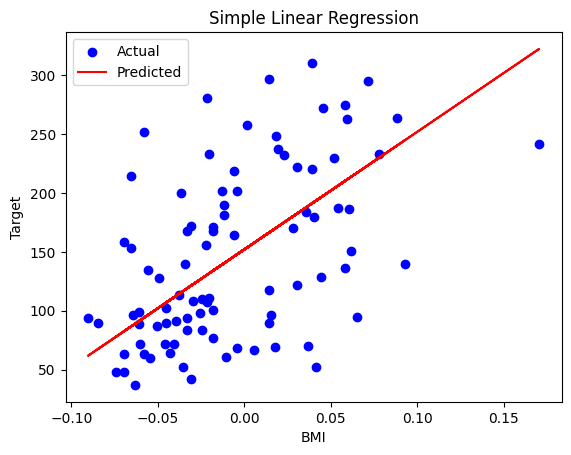

Multiple Regression:
MAE: 42.794094679599944, MSE: 2900.1936284934827, RMSE: 53.85344583676594, R²: 0.45260276297191926


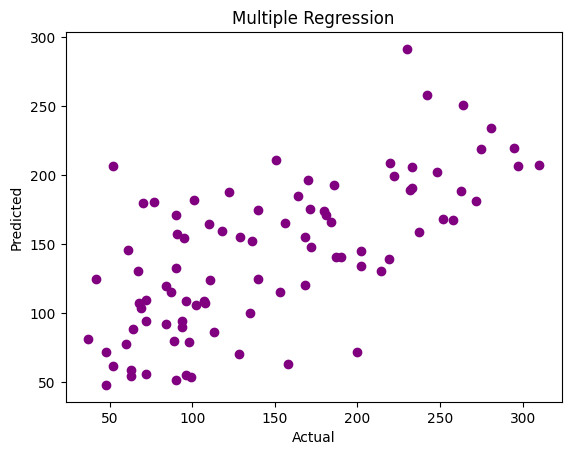

Polynomial Regression:
MAE: 52.38391176015265, MSE: 4085.025480871632, RMSE: 63.91420406194254, R²: 0.2289715971205667


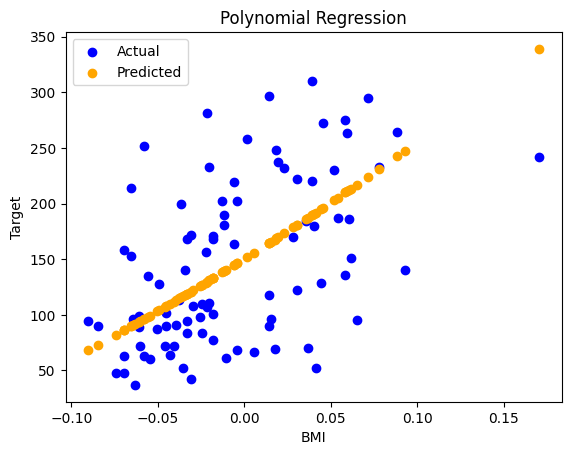

Ridge Regression (alpha=0.1):
MAE: 52.27416510238435, MSE: 3969.193513439806, RMSE: 63.00153580223109, R²: 0.25083430942665674
Lasso Regression (alpha=0.1):
MAE: 52.26123410833456, MSE: 4017.0287468800143, RMSE: 63.38003429219658, R²: 0.2418056451469669
Ridge Regression (alpha=1.0):
MAE: 55.958916405864045, MSE: 4196.977562827367, RMSE: 64.78408417834868, R²: 0.20784119405367074
Lasso Regression (alpha=1.0):
MAE: 54.2844294922772, MSE: 4050.8402988914545, RMSE: 63.646211975980584, R²: 0.23542388154027005
Ridge Regression (alpha=10.0):
MAE: 62.62706771123811, MSE: 5104.0802201953, RMSE: 71.4428458293432, R²: 0.03663004336854614
Lasso Regression (alpha=10.0):
MAE: 64.00646146990485, MSE: 5361.533457238513, RMSE: 73.22249283682244, R²: -0.011962984778542296


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Data Preparation
# Load dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Convert to DataFrame for exploration
data = pd.DataFrame(data=X, columns=diabetes.feature_names)
data['target'] = y

# Check for missing values
print("Missing values:", data.isnull().sum())

# Data overview
print(data.describe())

# Step 2: Simple Linear Regression
# Use only one feature for simple linear regression
X_single = X[:, np.newaxis, 2]  # Example: using BMI feature

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)

# Train model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict
y_pred = linear_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Simple Linear Regression:")
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")

# Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title("Simple Linear Regression")
plt.xlabel("BMI")
plt.ylabel("Target")
plt.legend()
plt.show()

# Step 3: Multiple Regression
# Split data for multiple regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Predict
y_pred = multi_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Multiple Regression:")
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")

# Visualization
plt.scatter(y_test, y_pred, color='purple')
plt.title("Multiple Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# Step 4: Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_single)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train model
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

# Predict
y_pred = poly_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Polynomial Regression:")
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")

# Visualization
plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 1], y_pred, color='orange', label='Predicted')
plt.title("Polynomial Regression")
plt.xlabel("BMI")
plt.ylabel("Target")
plt.legend()
plt.show()

# Step 5: Ridge and Lasso Regression
alphas = [0.1, 1.0, 10.0]

for alpha in alphas:
    # Ridge Regression
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)

    print(f"Ridge Regression (alpha={alpha}):")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_ridge)}, MSE: {mean_squared_error(y_test, y_pred_ridge)}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge))}, R²: {r2_score(y_test, y_pred_ridge)}")

    # Lasso Regression
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred_lasso = lasso_model.predict(X_test)

    print(f"Lasso Regression (alpha={alpha}):")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_lasso)}, MSE: {mean_squared_error(y_test, y_pred_lasso)}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso))}, R²: {r2_score(y_test, y_pred_lasso)}")
